# Project: Wrangling and Analyze Data

## Data Gathering

 
 
 
 
 
 
 
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tweepy
from timeit import default_timer as timer
import json

In [2]:
#import downloaded WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# import the requests library to download the tweet image 
import requests
import os

In [5]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
# Make directory if it doesn't already exist
folder_name = 'image_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#runs the api key and secrets from another directory

%run .ipynb_checkpoints/Tokens-checkpoint.ipynb

In [10]:
#authentication
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = twitter_archive.tweet_id.values

In [11]:
# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [12]:
# List of dictionaries to build file by file and later convert to a DataFrame
tweet_list = [] 
df_list = []

with open('tweet_json.txt', 'r') as files:
    for file in files.readlines():
        tweet_list.append(json.loads(file))
        

for tweet in tweet_list:
    df_list.append({'tweet_id':tweet['id'],
                       'retweet_count':tweet['retweet_count'],
                       "favourite_count":tweet['favorite_count']})
    df_add = pd.DataFrame(df_list,columns=['tweet_id','retweet_count',"favourite_count"])
        

In [13]:
df_add

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7009,33808
1,892177421306343426,5301,29330
2,891815181378084864,3481,22053
3,891689557279858688,7225,36938
4,891327558926688256,7760,35309
5,891087950875897856,2602,17812
6,890971913173991426,1663,10363
7,890729181411237888,15753,56864
8,890609185150312448,3620,24525
9,890240255349198849,6098,27962


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
image_df = pd.read_csv('image_folder/image-predictions.tsv',delimiter='\t')
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
df_add

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7009,33808
1,892177421306343426,5301,29330
2,891815181378084864,3481,22053
3,891689557279858688,7225,36938
4,891327558926688256,7760,35309
5,891087950875897856,2602,17812
6,890971913173991426,1663,10363
7,890729181411237888,15753,56864
8,890609185150312448,3620,24525
9,890240255349198849,6098,27962


### Programmatic assessment

In [17]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
1294,707995814724026368,NaN,NaN,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
1107,734776360183431168,NaN,NaN,2016-05-23 16:01:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Livvie. Someone should tell her it's b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734776360...,11,10,Livvie,None,None,None,None
625,795400264262053889,NaN,NaN,2016-11-06 22:59:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's trying to make the same fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795400264...,12,10,Brody,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,None,None,None
977,750011400160841729,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None


In [20]:
def unique_count(df,columns):
    for col in columns:
        uniq_val = df[col].value_counts(ascending=False)
        print("==="+ col + "===")
        print(uniq_val,'\n')

In [21]:
columns=['doggo','floofer','pupper','puppo','name','rating_numerator','rating_denominator']

unique_count(twitter_archive,columns)

===doggo===
None     2259
doggo      97
Name: doggo, dtype: int64 

===floofer===
None       2346
floofer      10
Name: floofer, dtype: int64 

===pupper===
None      2099
pupper     257
Name: pupper, dtype: int64 

===puppo===
None     2326
puppo      30
Name: puppo, dtype: int64 

===name===
None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Buddy          7
Bailey         7
Daisy          7
Jack           6
Oscar          6
Stanley        6
Milo           6
Jax            6
Bella          6
Scout          6
Rusty          6
Koda           6
Dave           6
Leo            6
Chester        5
            ... 
Nimbus         1
Reagan         1
Diogi          1
Arya           1
Finnegus       1
Rodman         1
Theo           1
Jarvis         1
Snickers       1
Alejandro      1
Timmy   

In [22]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
twitter_archive.duplicated().sum()

0

In [24]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
image_df.duplicated().sum()

0

In [27]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
columns=['p1','p2','p3']
unique_count(image_df,columns)

===p1===
golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
 

In [29]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id           2327 non-null int64
retweet_count      2327 non-null int64
favourite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [30]:
df_add.describe()

,tweet_id,retweet_count,favourite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.204555,7054.403524
std,6.820795e+16,4185.175260,10962.883010
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.000000
50%,7.178418e+17,1149.000000,3050.000000
75%,7.986547e+17,2860.500000,8604.500000
max,8.924206e+17,70741.000000,144891.000000


In [31]:
df_add.sample(10)

,tweet_id,retweet_count,favourite_count
1647,682242692827447297,1040,2972
1203,713177543487135744,2600,6665
144,863062471531167744,2092,7523
414,820749716845686786,9221,29849
1987,672169685991993344,320,908
121,868552278524837888,1754,8972
2304,666337882303524864,79,168
708,782021823840026624,5741,0
763,775085132600442880,4374,14631
1663,681320187870711809,672,2415


In [32]:
df_add.isnull().sum()

tweet_id           0
retweet_count      0
favourite_count    0
dtype: int64

In [33]:
df_add.duplicated().sum()

0

In [34]:
all_columns=pd.Series(list(twitter_archive) + list(image_df) + list(df_add))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

## Quality issues


1.Invalid: missing `name` ('None' instead of Nan) in twitter_archive  

2.Accuracy: a,the,quite,an and such in `name`

3.completeness: missing `doggo floof pupper puppo`

4.Completeness: Missing `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp ` in twitter_archive

5.Invalid: `timestamp` not in datetime format

6.Completeness: missing `jpg_url`2057 out of 2327

7.Accuracy: `floofer` instead of floof

8.Accuracy: Non descriptive column names (`p1, p2, p3`) in image_df

### Tidiness issues
1.`doggo floofer pupper puppo` should be one column. 

2.there should be just a table to for twitter_archive, image_df, df_addd

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
twit_arch_clean = twitter_archive.copy()
img_pred_clean = image_df.copy()
df_add_clean = df_add.copy()

In [36]:
twit_arch_clean.name.value_counts(ascending=False).tail(20)

Timmy       1
Gordon      1
Craig       1
Caryl       1
Fillup      1
Siba        1
Rooney      1
Marq        1
Taz         1
Skittles    1
Julio       1
Chevy       1
Mona        1
Divine      1
Ralphie     1
Lucky       1
Milky       1
Ronduh      1
Dylan       1
Petrick     1
Name: name, dtype: int64

### Issue #1: missing `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp` in twitter_archive table

#### Define: Drop these columns

#### Code

In [37]:
unwanted_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                 'retweeted_status_user_id', 'retweeted_status_timestamp']
twit_arch_clean.drop(columns=unwanted_cols,inplace=True)

#### Test

In [38]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2: Floofer instead of floof

#### Define: remove the 'er'

#### Code

In [39]:
twit_arch_clean.rename(columns={"floofer":"floof"},inplace=True)

#### Test

In [40]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floof                 2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #3: `doggo floof pupper puppo` should be one column


#### Define: merge `doggo floof pupper puppo` into a column named dog_stage

#### Code

In [41]:
twit_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
#replace None with "" to ease merge
dog_stages = ["puppo","pupper","floof","doggo"]
for stage in dog_stages:
    twit_arch_clean[stage].replace({"None":""},inplace=True)

# create `"dog_stages"` column
twit_arch_clean['dog_stages'] = (twit_arch_clean.puppo + twit_arch_clean.pupper 
                                    + twit_arch_clean.floof + twit_arch_clean.doggo)

In [43]:
#drop ind

twit_arch_clean.drop(columns=["doggo","floof","pupper","puppo"],inplace=True)

#### Test

In [44]:
#check the changes
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


### Issue #4: missing `doggo floof pupper puppo`

#### Define: replace missing `doggo floofer pupper puppo` with NaN

#### Code

In [45]:
twit_arch_clean.dog_stages.value_counts()

                1976
pupper           245
doggo             83
puppo             29
pupperdoggo       12
floofer            9
puppodoggo         1
flooferdoggo       1
Name: dog_stages, dtype: int64

In [46]:

twit_arch_clean.replace("",np.nan,inplace=True)

In [47]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            380 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


In [48]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            380 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


#### Test

In [49]:
twit_arch_clean.dog_stages.value_counts()

pupper          245
doggo            83
puppo            29
pupperdoggo      12
floofer           9
puppodoggo        1
flooferdoggo      1
Name: dog_stages, dtype: int64

### Issue #5: missing `name` ('None' instead of Nan) in twitter_archive

#### Define: replace None with Nan

#### Code

In [50]:
twit_arch_clean.replace('None',np.nan,inplace=True)

#### Test

In [51]:
#after cleaning
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_stages            380 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


In [52]:
#before cleaning
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue 6: `timestamp` should be in datetime format

#### Define: change timestamp str format to datetime

#### Code

In [53]:
twit_arch_clean['timestamp'] =pd.to_datetime(twit_arch_clean['timestamp'])

#### Test

In [54]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_stages            380 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


### Issue 7:  a,the,quite,an and such in `name`

#### Define: convert all these non-names to NaN

#### Code

In [55]:
non_names = ['a','the','quite','an','such']
twit_arch_clean.replace(non_names,np.nan,inplace=True)

#### Test

In [56]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1536 non-null object
dog_stages            380 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


In [57]:
twit_arch_clean.name.value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
Daisy         7
Toby          7
Buddy         7
Bailey        7
Leo           6
Scout         6
Koda          6
Bella         6
Rusty         6
Stanley       6
Dave          6
Jax           6
Oscar         6
Jack          6
Milo          6
Sunny         5
Louis         5
Chester       5
Finn          5
George        5
             ..
Willem        1
Zooey         1
Nimbus        1
Reagan        1
Diogi         1
Theo          1
Dylan         1
Skye          1
Rooney        1
Tom           1
Jarvis        1
Alejandro     1
Timmy         1
Gordon        1
Craig         1
Caryl         1
Fillup        1
Siba          1
Marq          1
Ronduh        1
Snickers      1
Taz           1
Julio         1
Chevy         1
Mona          1
Divine        1
Ralphie       1
Lucky         1
Milky         1
Petrick       1
Name: name, Length: 951,

### Issue #8: there should be just a table to for twitter_archive, image_df, df_addd

#### Define: merge the three tables on tweet_id

#### Code

In [58]:
df_master = pd.merge(twit_arch_clean, img_pred_clean,on='tweet_id', how='left').merge(df_add_clean,on='tweet_id')

In [59]:
df_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 22 columns):
tweet_id              2327 non-null int64
timestamp             2327 non-null datetime64[ns]
source                2327 non-null object
text                  2327 non-null object
expanded_urls         2269 non-null object
rating_numerator      2327 non-null int64
rating_denominator    2327 non-null int64
name                  1521 non-null object
dog_stages            375 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
retweet_count         232

### Issue #9: missing `jpg_url` 2057 out of 2327

#### Define: drop rows without jpg_url

#### Code

In [60]:
df_master.dropna(subset=["jpg_url"],inplace=True)

#### Test

In [61]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2326
Data columns (total 22 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null datetime64[ns]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  1413 non-null object
dog_stages            318 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
p1                    2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
p2                    2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
p3                    2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
retweet_count         205

### Issue 10: Non descriptive column names (`p1, p2, p3`) 

#### Define: rename column names

#### Code

In [62]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33808
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29330
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22053
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7225,36938
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7760,35309


In [63]:
df_master.rename(columns={"p1":"prediction_1","p2":"prediction_2","p3":"prediction_3"},inplace=True)

#### Test

In [64]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2326
Data columns (total 22 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null datetime64[ns]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  1413 non-null object
dog_stages            318 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
prediction_1          2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null object
prediction_2          2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null object
prediction_3          2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null object
retweet_count         205

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
df_master.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [66]:
df = pd.read_csv("twitter_archive_master.csv")

In [67]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33808
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29330
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22053
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7225,36938
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7760,35309


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 22 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null object
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  1413 non-null object
dog_stages            318 non-null object
jpg_url               2057 non-null object
img_num               2057 non-null float64
prediction_1          2057 non-null object
p1_conf               2057 non-null float64
p1_dog                2057 non-null bool
prediction_2          2057 non-null object
p2_conf               2057 non-null float64
p2_dog                2057 non-null bool
prediction_3          2057 non-null object
p3_conf               2057 non-null float64
p3_dog                2057 non-null bool
retweet_count         2057 non-null int

### Research Questions

1. which dog stage is most common?

2. What are the top five dog names with the highest favourite count?

3. Which year has the most Twitter retweets?

In [69]:
#which dog stage is most common?

df.dog_stages.value_counts()

pupper          210
doggo            65
puppo            23
pupperdoggo      11
floofer           7
puppodoggo        1
flooferdoggo      1
Name: dog_stages, dtype: int64

In [70]:
#What are the top five dog names with the highest favourite count?
df.groupby('name')['favourite_count'].sum().sort_values(ascending=False).head()

name
Bo         159334
Stephan    111703
Jamesy     108921
Zoey        98782
Charlie     93223
Name: favourite_count, dtype: int64

In [71]:
#Which year has the most Twitter retweets?

# create a year column
df['tweet_year']= pd.DatetimeIndex(df.timestamp).year
  
df.groupby("tweet_year")['retweet_count'].sum().sort_values(ascending=False)

tweet_year
2016    2418476
2017    1871016
2015     572464
Name: retweet_count, dtype: int64

### Insights:
1.Puppo is the most prevalent dog stage.

2.The top five most popular dog names are Charlie, Jamesy, Zoey, Bo, and Stephan.

3.The year with the most Twitter retweets is 2016.

### Visualization

In [72]:
#What are the top five dog names with the highest favourite count?
data =df.groupby('name')['favourite_count'].sum().sort_values(ascending=False).head()

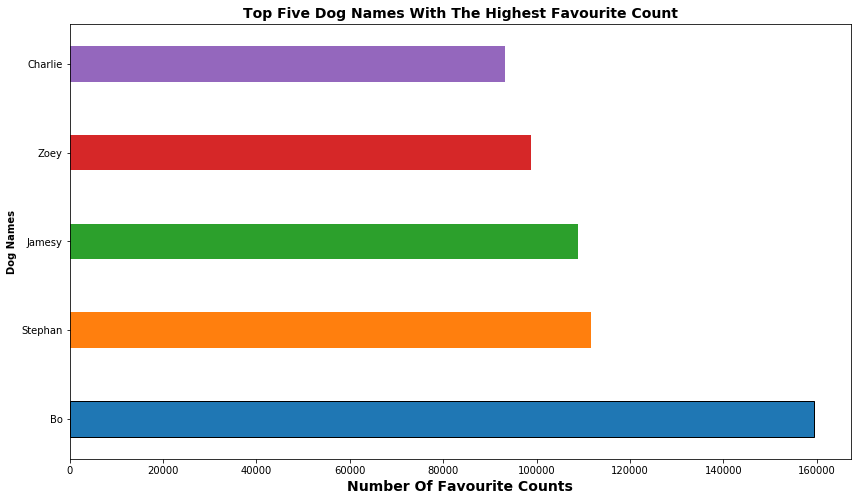

In [74]:
#plot
data.plot.barh(edgecolor='black',
                   figsize=[14,8],
                   rot=0,
                   width=0.4)
# Add title and format it
plt.title('Top five dog names with the highest favourite count'.title(), fontsize =14, weight = "bold")

#Add x label and format it
plt.xlabel('Number of favourite counts'.title(), fontsize =14, weight = "bold")
    
#Add y label and format it
plt.ylabel('Dog Names'.title(), fontsize=10, weight ="bold");